<a href="https://colab.research.google.com/github/antra0497/MLE-humming-and-whistling/blob/main/ECS7020P_miniproject_adv_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Author**

**Student Name**:  Antra Tripathi

**Student ID**:  210787830



# **2. Problem formulation**

An advanced Machine Learning solution to identify different audio files

*  Model 1:  Modified SVM Model
*  Model 2:  CNN 
* Unsupervised Gender Classification using hierarcial clustering based on mfcc feature of the audio files.

**Modified Features**: 

In basic solution we had used ```power, pitch_mean, pitch_std, voice_fr``` as features. Now we will be adding few more advanced features to refine the solution such as ``` mffc, chroma, mel-freq, contrast```

**Data Used:** ```MLEnd Hums and Whistles dataset```



# **3. Machine Learning pipeline**

*   **Data Used:** ```MLEnd Hums and Whistles ```
*   **Song Type:** ```Harry Potter, StarWars, Panther, Rain, Mamma, Frozen  and Hakuna```
*   **Audio Type:** ```Humming or Whistling```
*   **File Format:** ```.wav``` files

Underline Steps:
* Importing required python libraries
* Data Cleaning Function
* Reading and processing Harry Potter audio files
* Reading and processing StarWars audio files
* Merging and creating final dataframe
* Feature Extraction from the audio files
* Data Exploration
* Data Normalization
* Data Split
* Dummy check for Humming and Whistling classification. 
* Model 1: SVM classifier for 7 songs classifying 
* Model 2: CNN for 7 songs classification
* Analysing the results



#### **Importing required Python libraries** 

In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
drive.mount('/content/drive')

import IPython.display as ipd
from tqdm import tqdm #show a smart progress meter
import librosa # for loading the audio file to TS

from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  

In [ ]:
import tensorflow as tf
import keras
#from keras.callbacks import ModelCheckpoint 
from keras.models import Sequential, model_from_json
from keras.layers import Dense
from sklearn import model_selection

#### **Data Cleaning Function:**

In [ ]:
final_list=[]

In [ ]:
def get_clean_dataframe(files, song_list, title):
  '''
  This is a data cleaning function, its takes following inputs:

  files: list of the file paths whch are to be processed
  song_list: list of possible song names mentioned in the file name
  title: correct title of the file

  It returns a data frame containing following columns:
  file_id, participant, interpretation, number, song
  ''' 
  table = [] 

  for file in files:
    
    file_name = file.split('/')[-1] #complete file name

    participant_ID = file.split('/')[-1].split('_')[0] #extrating the participant id

    # to identify if file has lable 'hum' or 'whistle'
    try:
      if 'hum' in file_name:
        interpretation_type= 'hum'
      if 'whistle' in file_name:
        interpretation_type= 'whistle'
    except:
      print(file_name)


    num_list= ['1','2','3','4']
    sub_list= file_name.split('_')[1:]
    try:    
      interpretation_number = [num for sub in sub_list for num in num_list if num in sub][0]
    except:
      print(file_name)

    # check the possible file name and assigning the correct title of the song   
    try:
      song = [title for name in song_list if name in file_name][0]
    except:
      print(file_name)
    
    #appending all the correctly extracted info in a list 'table' 
    table.append([file_name,participant_ID,interpretation_type,interpretation_number, song])
  
  #finaly converting the list into the data frame
  df= pd.DataFrame(table,columns=['file_id','participant','interpretation','number','song']).set_index('file_id')    
  return df #returning the final data frame


#### **Data Processing of 7 songs**

1. Harry Potter:

In [ ]:
sample_path = '/content/drive/MyDrive/Colab Notebooks/ML/MiniProject/Full Data/HarryPotter/*.wav'
files_harry = glob.glob(sample_path)
final_list.extend(files_harry)

title='Harry'
song_list= ['Potter', 'potter', 'Harry', 'harry']

Harry_df= get_clean_dataframe(files_harry, song_list, title)

In [ ]:
print(len(files_harry))

411


2. StarWars:

In [ ]:
sample_path = '/content/drive/MyDrive/Colab Notebooks/ML/MiniProject/Full Data/StarWars/*.wav'
files_starwars = glob.glob(sample_path)
final_list.extend(files_starwars)

title='StarWars'
song_list= ['StarWars','StarWar','Star Wars','Star War','Starwars', 'Imperial', 'starwars','StarsWars',
              'star_wars', 'starwar', 'imperial_march','STARWAR', 'StartWars','StatWars','Star wars','star wars'] 

Starwars_df= get_clean_dataframe(files_starwars, song_list, title)

In [ ]:
print(len(files_starwars))

413


3. Panther:


In [ ]:
sample_path = '/content/drive/MyDrive/Colab Notebooks/ML/MiniProject/Full Data/Panther/*.wav'
files_panther = glob.glob(sample_path)
final_list.extend(files_panther)

title='Panther'
song_list= ['Panther', 'panther', 'pink panther', 'Panter'] 

Panther_df= get_clean_dataframe(files_panther, song_list, title)

In [ ]:
len(files_panther)

413

4. Frozen:

In [ ]:
sample_path = '/content/drive/MyDrive/Colab Notebooks/ML/MiniProject/Full Data/Frozen/*.wav'
files_frozen = glob.glob(sample_path)
final_list.extend(files_frozen)

title='Frozen'
song_list= ['Frozen', 'frozen', 'letitgo'] 

Frozen_df= get_clean_dataframe(files_frozen, song_list, title)

In [ ]:
len(files_frozen)

410

5. Hakuna:

In [ ]:
sample_path = '/content/drive/MyDrive/Colab Notebooks/ML/MiniProject/Full Data/Hakuna/*.wav'
files_hakuna = glob.glob(sample_path)
final_list.extend(files_hakuna)

title='Hakuna'
song_list= ['Hakuna', 'hakuna', 'hakunamatata', 'HaKuna', 'Hakana', 'Hukuna', 'Haknua'] 

Hakuna_df= get_clean_dataframe(files_hakuna, song_list, title)

In [ ]:
len(files_hakuna)

412

6. Mamma

In [ ]:
sample_path = '/content/drive/MyDrive/Colab Notebooks/ML/MiniProject/Full Data/Mamma/*.wav'
files_mamma = glob.glob(sample_path)
final_list.extend(files_mamma)

title='Mamma'
song_list= ['Mamma', 'mamma', 'mummamia', 'Mumma', 'mamamia', 'mamia', 'Mama'] 

Mamma_df= get_clean_dataframe(files_mamma, song_list, title)

7.Rain

In [ ]:
sample_path = '/content/drive/MyDrive/Colab Notebooks/ML/MiniProject/Full Data/Rain/*.wav'
files_rain = glob.glob(sample_path)
final_list.extend(files_rain)

title='Rain'
song_list= ['Rain', 'rain'] 

Rain_df= get_clean_dataframe(files_rain, song_list, title)

In [ ]:
len(files_rain)

413

#### **Final Dataset: Merging all the songs**

In [ ]:
final_df= pd.concat([Harry_df, Starwars_df, Frozen_df, Hakuna_df, Mamma_df, Rain_df, Panther_df], sort=False)

In [ ]:
len(final_list)

2884

In [ ]:
final_df.shape

(2884, 4)

In [ ]:
final_df['song'].unique()

array(['Harry', 'StarWars', 'Frozen', 'Hakuna', 'Mamma', 'Rain',
       'Panther'], dtype=object)

# **4.Transformation stage**

### **Feature Extraction:**

Previously we used following features from the audio data:

* Power
* Pitch Mean
* Pitch Std.
* Voice Frame
* Interpretation Label
* Song Label

Advance features which we have added are:
* MFFC
* Chroma
* Mel-fre
* Contrast

we performed this in Python using the Librosa package and resulted in 187 features. The features which we obtained were MFCCs, STFT_Chroma, Melspectrogram, and Spectral Contrast.

In [ ]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

In [ ]:
def getfeatures(files,labels_file, scale_audio=False, onlySingleDigit=False):
  # different song lable 
  slable= ['Frozen', 'Harry', 'Panther', 'StarWars', 'Rain','Hakuna', 'Mamma']
  X,y,z =[],[],[]
  for file in tqdm(files):
    features = []
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]

    # Feature for interpretation type of the file, True for hum, False for whistle
    y1 = labels_file.loc[fileID]['interpretation']=='hum'

    # Feature for type of the song,
    if(labels_file.loc[fileID]['song']==slable[0]):
      y2 = 0 # label 0 if file is Frozen song
    elif(labels_file.loc[fileID]['song']==slable[1]):
      y2 = 1 # label 1 if file is Harry song
    elif(labels_file.loc[fileID]['song']==slable[2]):
      y2 = 2 # label 2 if file is Panther song
    elif(labels_file.loc[fileID]['song']==slable[3]):
      y2 = 3 # label 3 if file is Starwars song
    elif(labels_file.loc[fileID]['song']==slable[4]):
      y2 = 4 # label 4 if file is Raina song
    elif(labels_file.loc[fileID]['song']==slable[5]):
      y2 = 5 # label 5 if file is Hakuna song
    else:
      y2 = 6 # label 6 if file is Mamma song

    #print('Y2 is :',y2)
    
    fs = None # if None, fs would be 22050
    audio_data, sample_rate = librosa.load(file,sr=fs)
    x=audio_data
    fs=sample_rate

    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)

    stft = np.abs(librosa.stft(audio_data))
    
    mfcc = np.mean(librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40).T,axis=0)
    features.extend(mfcc) # 40 = 40
    
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    features.extend(chroma) # 12 = 52
    
    mel = np.mean(librosa.feature.melspectrogram(audio_data, sr=sample_rate).T,axis=0)
    features.extend(mel) # 128 = 180
    
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    features.extend(contrast) # 7 = 187

    # appending four calculated features
    xi = [power,pitch_mean,pitch_std,voiced_fr]
    features.extend(xi)
    # appending all the features
    X.append(features)
    y.append(y1) # interpretation label
    z.append(y2) # song label

  return np.array(X),np.array(y),np.array(z)

In [ ]:
X,y,x = getfeatures(final_list, labels_file=final_df, scale_audio=True, onlySingleDigit=True)

100%|██████████| 2884/2884 [3:07:33<00:00,  3.90s/it]


### **Feature Scaling: Data Normalization**

Its important to scale our feature before using them in any Machine Learning algorithms as all the features have different scale and will not be treated uniformly by the ML model if not scaled. 

Using Standard Scaler library of sklearn preprocessing package.
It uses ```z-score``` to normalize the data.

Unscaled Data:

In [ ]:
#converting the scaled features into a pandas data frame
allsong_feature= pd.DataFrame(X)
allsong_feature['interpret_lable']= y
allsong_feature['song_lable']= x
#saving the unscaled features into a csv for future reference
allsong_feature.to_csv('/content/drive/MyDrive/Colab Notebooks/ML/MiniProject/allsong_feature.csv')

Scaled Data:

In [ ]:
scaler = StandardScaler() # define standard scaler
scaled = scaler.fit_transform(X) # transform data

#converting the scaled features into a pandas data frame
allsong_feature_combine= pd.DataFrame(scaled)
allsong_feature_combine['interpret_lable']= y
allsong_feature_combine['song_lable']= x

#saving the features into a csv for future reference
allsong_feature_combine.to_csv('/content/drive/MyDrive/Colab Notebooks/ML/MiniProject/allsong_feature_combine.csv')

# **5.Modelling**


#### **Reading feature file**

In [ ]:
allsongs_df_scaled= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/MiniProject/allsong_feature_combine.csv').drop(columns={'Unnamed: 0'})

In [ ]:
allsongs_df_unscaled= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/MiniProject/allsong_feature.csv').drop(columns={'Unnamed: 0'})

In [ ]:
allsongs_df_scaled.shape

(2884, 193)

#### **Data Split**

There are total 2884 audio files in total and 193 features. 
We will be spliting our dataset in 7:2:1 ratio
* 70% files for training 
* 20% files for validation
* 10% files for testing


In [ ]:
X=allsongs_df_scaled.iloc[:,0:190].values # all the features
y=allsongs_df_scaled['interpret_lable'] # hum or whistle

Spliting main dataset into 70% (training) and 30% (remaining)

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y,test_size=0.3)

Spliting remaining 30% files int0 2:1 ratio for validation and testing

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem,test_size=0.1)

In [ ]:
#checking the data split 
print('Size of training set:', X_train.shape, y_train.shape)
print('Size of validation set:', X_val.shape, y_val.shape)
print('Size of testing set:', X_test.shape, y_test.shape)

Size of training set: (2018, 190) (2018,)
Size of validation set: (779, 190) (779,)
Size of testing set: (87, 190) (87,)


#### **Classify if the audio is Hum or Whistle???**

In [ ]:
model  = svm.SVC(C=1)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.9801783944499505
Validation  Accuracy 0.9717586649550706
The support vectors are (333, 190)


In [ ]:
y_pred = model.predict(X_val) # predicted percentages
cm = confusion_matrix(y_val, y_pred)

In [ ]:
classes= ['Hum', 'Whistle']
n_classes=len(classes)

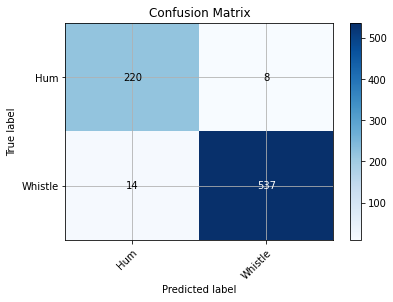

In [ ]:
plot_confusion_matrix(cm)

#### **Model 1: SVM (just on StarWars and Harry potter)**

In [ ]:
scaled_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/MiniProject/feature_combine.csv').drop(columns={'Unnamed: 0'})

In [ ]:
X=scaled_data.iloc[:,0:190].values # all the features
y=scaled_data['song_lable'].values

In [ ]:
scaled_data['song_lable'].unique()

array([7, 4])

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y,test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem,test_size=0.1)

#checking the data split 
print('Size of training set:', X_train.shape, y_train.shape)
print('Size of validation set:', X_val.shape, y_val.shape)
print('Size of testing set:', X_test.shape, y_test.shape)

Size of training set: (576, 190) (576,)
Size of validation set: (223, 190) (223,)
Size of testing set: (25, 190) (25,)


In [ ]:
model  = svm.SVC(C=1)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.7638888888888888
Validation  Accuracy 0.6995515695067265
The support vectors are (511, 190)


We can cleary see that the model has improved on adding the advance features

SVM performance for 2 songs in Basic solution:
```
Training Accuracy 0.6840277777777778
Validation  Accuracy 0.5874439461883408
```

SVM performance for 2 songs in Advance solution:
```
Training Accuracy 0.7638888888888888
Validation  Accuracy 0.6995515695067265
```

#### **Model 1: SVM (For all the 7 Songs):**

In [ ]:
X=allsongs_df_scaled.iloc[:,0:190].values # all the features
y=allsongs_df_scaled['song_lable'].values

In [ ]:
allsongs_df_scaled['song_lable'].unique()

array([1, 3, 2, 0, 5, 6, 4])

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y,test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem,test_size=0.1)

#checking the data split 
print('Size of training set:', X_train.shape, y_train.shape)
print('Size of validation set:', X_val.shape, y_val.shape)
print('Size of testing set:', X_test.shape, y_test.shape)

Size of training set: (2018, 190) (2018,)
Size of validation set: (779, 190) (779,)
Size of testing set: (87, 190) (87,)


In [ ]:
model  = svm.SVC(C=1)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.5252725470763132
Validation  Accuracy 0.38125802310654683
The support vectors are (1952, 190)


Applying Grid Search for SVM:

In [ ]:
param_grid = {
    'C': [0.1,1, 10, 100], 
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
    }

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.6s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.6s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.001)


In [ ]:
grid_predictions = grid.predict(X_val)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_val,grid_predictions))
print(classification_report(y_val,grid_predictions))

[[59 11 10 10  5  9 20]
 [12 54 26 10  8  8  9]
 [12 29 39 13  6  9 12]
 [19 21 15 28 13  8 17]
 [ 9 29 23 17 33  9  9]
 [12  5 10 10  4 55 22]
 [ 8  5 20 10  1 26 57]]
              precision    recall  f1-score   support

           0       0.45      0.48      0.46       124
           1       0.35      0.43      0.38       127
           2       0.27      0.33      0.30       120
           3       0.29      0.23      0.26       121
           4       0.47      0.26      0.33       129
           5       0.44      0.47      0.45       118
           6       0.39      0.45      0.42       127

    accuracy                           0.38       866
   macro avg       0.38      0.38      0.37       866
weighted avg       0.38      0.38      0.37       866



Grid Search resulted in 38% accuracy on the validation set


#### **Model 2: Using Neural Network**

In [ ]:
### Training / Fitting / Optimizing Model #####
test_size = 0.3
epochs    = 30
batch_size= 10
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [ ]:
classes= ['Frozen', 'Harry', 'Panther', 'StarWars', 'Rain','Hakuna', 'Mamma']
n_classes=len(classes)

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu',  input_dim=X_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(n_classes, activation='softmax')) # sigmoid

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
history= None
history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_val, y_val),
#                         shuffle=True,
                        verbose=2)

Epoch 1/30
202/202 - 2s - loss: 1.8785 - accuracy: 0.2711 - val_loss: 1.7504 - val_accuracy: 0.3440 - 2s/epoch - 7ms/step
Epoch 2/30
202/202 - 1s - loss: 1.6228 - accuracy: 0.3870 - val_loss: 1.6681 - val_accuracy: 0.3941 - 517ms/epoch - 3ms/step
Epoch 3/30
202/202 - 1s - loss: 1.4630 - accuracy: 0.4519 - val_loss: 1.6634 - val_accuracy: 0.3928 - 523ms/epoch - 3ms/step
Epoch 4/30
202/202 - 1s - loss: 1.3512 - accuracy: 0.4980 - val_loss: 1.6779 - val_accuracy: 0.4146 - 625ms/epoch - 3ms/step
Epoch 5/30
202/202 - 1s - loss: 1.2347 - accuracy: 0.5496 - val_loss: 1.6510 - val_accuracy: 0.4300 - 543ms/epoch - 3ms/step
Epoch 6/30
202/202 - 1s - loss: 1.1114 - accuracy: 0.5956 - val_loss: 1.7828 - val_accuracy: 0.4275 - 540ms/epoch - 3ms/step
Epoch 7/30
202/202 - 1s - loss: 1.0150 - accuracy: 0.6249 - val_loss: 1.8096 - val_accuracy: 0.4108 - 629ms/epoch - 3ms/step
Epoch 8/30
202/202 - 1s - loss: 0.9062 - accuracy: 0.6710 - val_loss: 1.9572 - val_accuracy: 0.4018 - 538ms/epoch - 3ms/step
Epo

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               48896     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 7)                 455       
                                                                 
Total params: 90,503
Trainable params: 90,503
Non-trainable params: 0
_________________________________________________________________


In [ ]:
score_train = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score_train[1])
print("Training Cross Entropy: %.2f" % score_train[0])

score_test = model.evaluate(X_val, y_val, verbose=0)
print("Validation Accuracy: ", score_test[1])
print("Validation Cross Entropy: %.2f" % score_test[0])

Training Accuracy:  0.9856293201446533
Training Cross Entropy: 0.06
Validation Accuracy:  0.43132221698760986
Validation Cross Entropy: 4.49


# **6. Methodology**

Analysing the accuracy and confusion matrix for better understanding of the results.

In [ ]:
def plot_confusion_matrix(cm):
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes,
           yticklabels=classes,
           title="Confusion Matrix",
           ylabel='True label',
           xlabel='Predicted label')
    ax.set_ylim(len(classes)-0.5, -0.5)
    ax.set_aspect('auto')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.grid(None)
    plt.show()

#### **Accuracy of SVM model:**

In [ ]:
print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.5252725470763132
Validation  Accuracy 0.38125802310654683
The support vectors are (1952, 190)


#### **Confusing Matrix : SVM**

In [ ]:
y_pred = model.predict(X_val) # predicted percentages
cm = confusion_matrix(y_val, y_pred)

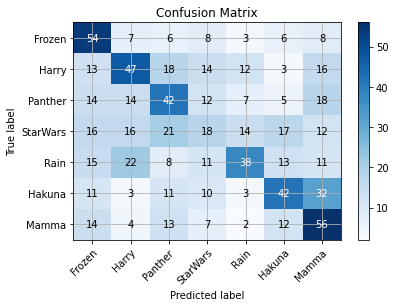

In [ ]:
classes= ['Frozen', 'Harry', 'Panther', 'StarWars', 'Rain','Hakuna', 'Mamma']
n_classes=len(classes)

plot_confusion_matrix(cm)

#### **Accuracy of CNN Model**

In [ ]:
score_train = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score_train[1])
print("Training Cross Entropy: %.2f" % score_train[0])

score_test = model.evaluate(X_val, y_val, verbose=0)
print("Validation Accuracy: ", score_test[1])
print("Validation Cross Entropy: %.2f" % score_test[0])

Training Accuracy:  0.9856293201446533
Training Cross Entropy: 0.06
Validation Accuracy:  0.43132221698760986
Validation Cross Entropy: 4.49


#### **Confusion Matrix for CNN Model**

In [ ]:
y_pred_percentages = model.predict(X_val) # predicted percentages
y_pred = np.argmax(y_pred_percentages, axis=1) # Most prevalent prediction
cm = confusion_matrix(y_val, y_pred)

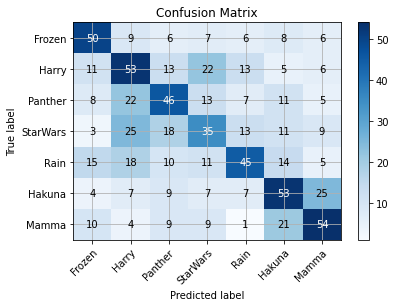

In [ ]:
plot_confusion_matrix(cm)

#**7. Dataset**

Visulaizing a wave form:

In [ ]:
import librosa
audio_path = '/content/drive/MyDrive/Colab Notebooks/ML/MiniProject/Full Data/Frozen/S101_hum_2_Frozen.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [ ]:
import IPython.display as ipd
ipd.Audio(audio_path)

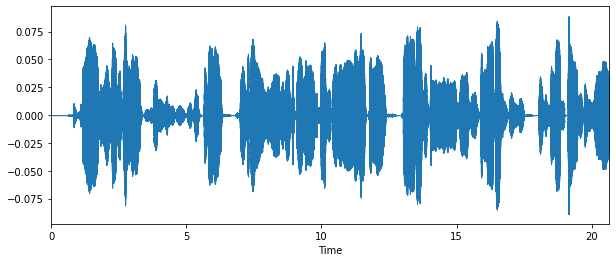

In [ ]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 4))
librosa.display.waveplot(x, sr=sr)

Melspectrogram:

(128, 889)


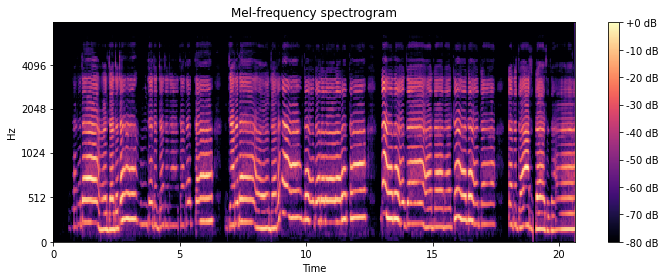

In [ ]:
S = librosa.feature.melspectrogram(y=x, sr=sr)

import numpy as np

plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
print(S_dB.shape)
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

Spectral Contrast: 

(7, 889)


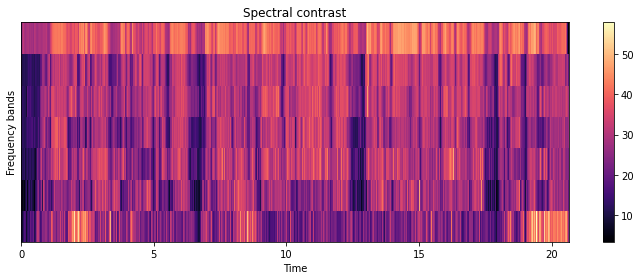

In [ ]:
S = np.abs(librosa.stft(x))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)
print(contrast.shape)

plt.figure(figsize=(10,4))
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')
plt.tight_layout()
plt.show()

MFCC:

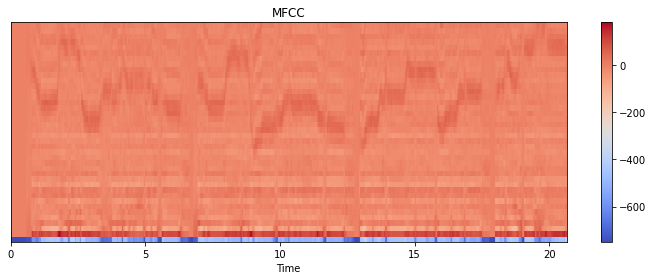

In [ ]:
mfcc = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [ ]:
allsongs_df_scaled[allsongs_df_scaled['interpret_lable']==True].describe() #for humming files
# 0-39: mfcc features
# 40-51: chroma
# 52-179: mel
# 180-186: contrast
# 187: power, 188: pitch mean, 189: pitch std, 190: voice frame

0            1  ...          190   song_lable
count  2073.000000  2073.000000  ...  2073.000000  2073.000000
mean     -0.006112     0.396743  ...     0.213381     2.988423
std       1.002826     0.772021  ...     0.861284     1.995134
min      -3.564040    -2.161835  ...    -5.172801     0.000000
25%      -0.635525    -0.108227  ...    -0.240485     1.000000
50%      -0.035229     0.441988  ...     0.317664     3.000000
75%       0.593061     0.917989  ...     0.825661     5.000000
max       4.154300     2.872313  ...     1.879021     6.000000

[8 rows x 192 columns]

In [ ]:
allsongs_df_scaled[allsongs_df_scaled['interpret_lable']==False].describe() #for whistling files
# 0-39: mfcc features
# 40-51: chroma
# 52-179: mel
# 180-186: contrast
# 187: power, 188: pitch mean, 189: pitch std, 190: voice frame

0           1           2  ...         189         190  song_lable
count  811.000000  811.000000  811.000000  ...  811.000000  811.000000  811.000000
mean     0.015622   -1.014117   -0.662674  ...   -0.338311   -0.545424    3.039457
std      0.993805    0.776741    0.864305  ...    0.897318    1.117382    2.008235
min     -3.103245   -2.811174   -3.289281  ...   -1.750063   -5.241225    0.000000
25%     -0.631656   -1.570398   -1.249228  ...   -0.765194   -1.086390    1.000000
50%      0.051753   -1.093713   -0.679397  ...   -0.472176   -0.372180    3.000000
75%      0.643349   -0.544177   -0.052580  ...   -0.162393    0.225302    5.000000
max      3.726569    2.133693    2.035967  ...    6.782396    1.422897    6.000000

[8 rows x 192 columns]

# **8. Results** 

Lets us test the model on the test files:


In [ ]:
print('Size of testing set:', X_test.shape, y_test.shape)

Size of testing set: (87, 190) (87,)


#### **Testing for SVM**

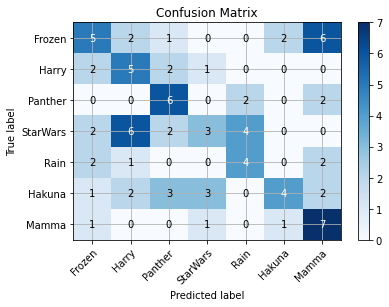

In [ ]:
y_tpred = model.predict(X_test)  # Most prevalent prediction
cm = confusion_matrix(y_test, y_tpred)

#ploting confusing matrix on testing set
plot_confusion_matrix(cm)

In [ ]:
print('Training Accuracy', np.mean(yt_p==y_train))
print('Testing Accuracy', np.mean(y_tpred==y_test))

Training Accuracy 0.5252725470763132
Testing Accuracy 0.39080459770114945


#### **Testing for CNN**

In [ ]:
score_test = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score_test[1])
print("Testing Cross Entropy: %.2f" % score_test[0])

Validation Accuracy:  0.4137931168079376
Validation Cross Entropy: 6.17


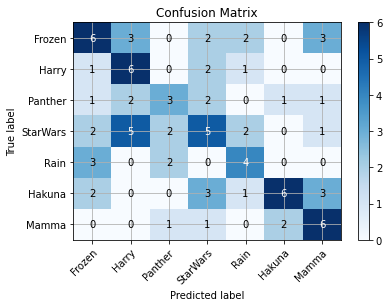

In [ ]:
y_pred_percentages = model.predict(X_test) # predicted percentages
y_pred = np.argmax(y_pred_percentages, axis=1) # Most prevalent prediction
cm = confusion_matrix(y_test, y_pred)

#ploting confusing matrix on testing set
plot_confusion_matrix(cm)

In [ ]:
print('Testing Accuracy', np.mean(y_pred==y_test))

Testing Accuracy 0.41379310344827586


# **9. Conclusion**

1. SVM Model:
```
Training Accuracy 0.5252725470763132
Validation  Accuracy 0.38125802310654683
Testing Accuracy 0.39080459770114945
```
2. CNN Model:
```
Training Accuracy:  0.9856293201446533
Validation Accuracy:  0.43132221698760986
Testing Accuracy 0.41379310344827586
```



We can conclude that a CNN model performs better 2885 audio files as compared to a SVM Model. 

The advance feature extraction has improved the accuracy of both the model, irrespective of the fact that we have not done any audio engineering that is any kind of noise reduction.

**Based on our CNN Model:**

**Songs which are performing good:** ```Frozen, Harry, Hakuna, Mamma```

**Songs which are not performing good:** ```Panther, Starwars, Rain```

The above results make sence as Starwars and Rain are difficult songs to hum or whistle.

---

# **10. Appendix :** Unsupervise learning

Attempting Unsupervised learning for gender classification using Hierarchical Clustering on Humming Data:

Referenced Paper: *Gender Identification using MFCC for 
Telephone Applications – A Comparative Study*


Common approaches for gender recognition are based on 
the analysis of pitch of the speech. However, gender 
recognition using a single feature is not sufficiently accurate 
for a large variety of speakers. To capture differences in both 
time domain and frequency domain, a set of features known as 
Mel-frequency cepstrum coefficients (MFCC) are used. These are widely used state-of-the-art features for automatic 
speech and speaker recognition. MFCC features are extracted 
from speech signals over a small window of 20 to 40 
milliseconds. These features are also known to work efficiently 
in noisy environments. Due to their robust nature, they are 
widely used in speaker recognition tasks



In [ ]:
data= allsongs_df_scaled[allsongs_df_scaled['interpret_lable']==True]

In [ ]:
mfcc= data.iloc[:,0:39]

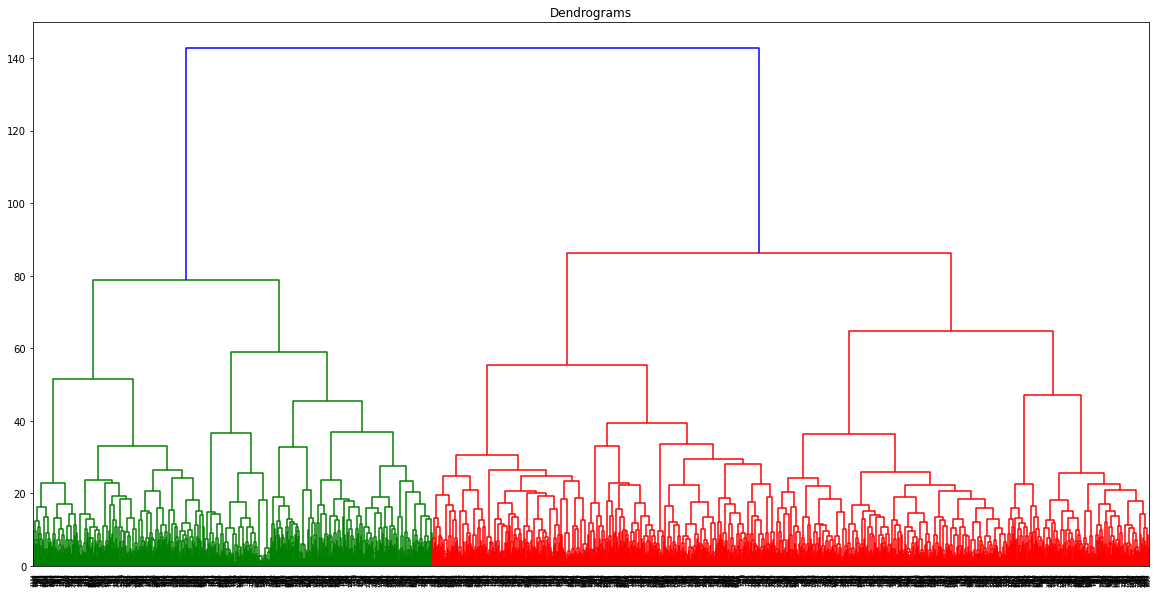

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(mfcc, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(mfcc)

array([0, 0, 0, ..., 1, 1, 0])

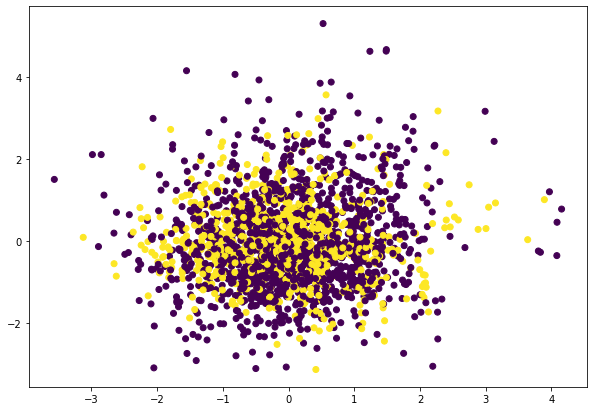

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data['0'], data['39'], c=cluster.labels_)

The above graph shows a possible Gender identification using mfcc features. This can be validated if we get demographic data. 